In [31]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn import metrics
import seaborn as seabornInstance 
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [2]:
os.chdir('U:\\ProjectDataset')

In [10]:
dt=pd.read_excel('PCA_LUAD_L.xlsx',index_col=0)  #import data set

In [11]:
tar=pd.read_excel('survival_LUAD.xlsx') #target variable

In [12]:
import numpy as np
from sklearn import linear_model

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
Y=tar

In [19]:
X_train,X_test,y_train,y_test=train_test_split(dt,Y,test_size=0.3,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print(X_train.shape,Y_train.shape)           
print(X_test.shape,Y_test.shape)

(288, 16) (361, 1)
(156, 16) (156, 1)


In [26]:
#Applying Linear Regression
lm=linear_model.LinearRegression()
model=lm.fit(X_train,y_train)
y_predval=lm.predict(X_val)

In [28]:
# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_val, y_predval))

# Print result of MSE
print(metrics.mean_squared_error(y_val, y_predval))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_val, y_predval)))
print('Variance score: %.2f' % model.score(X_val, y_val))

7.552613452528409
190.7232483372828
13.810258807758919
Variance score: 0.85


In [32]:
# KFOlD
estimator = model
kfold = KFold(n_splits=2, random_state=0)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print(results)
print(results.mean(), results.std())

[0.70347158 0.80135131]
0.7524114428139482 0.04893986778550785


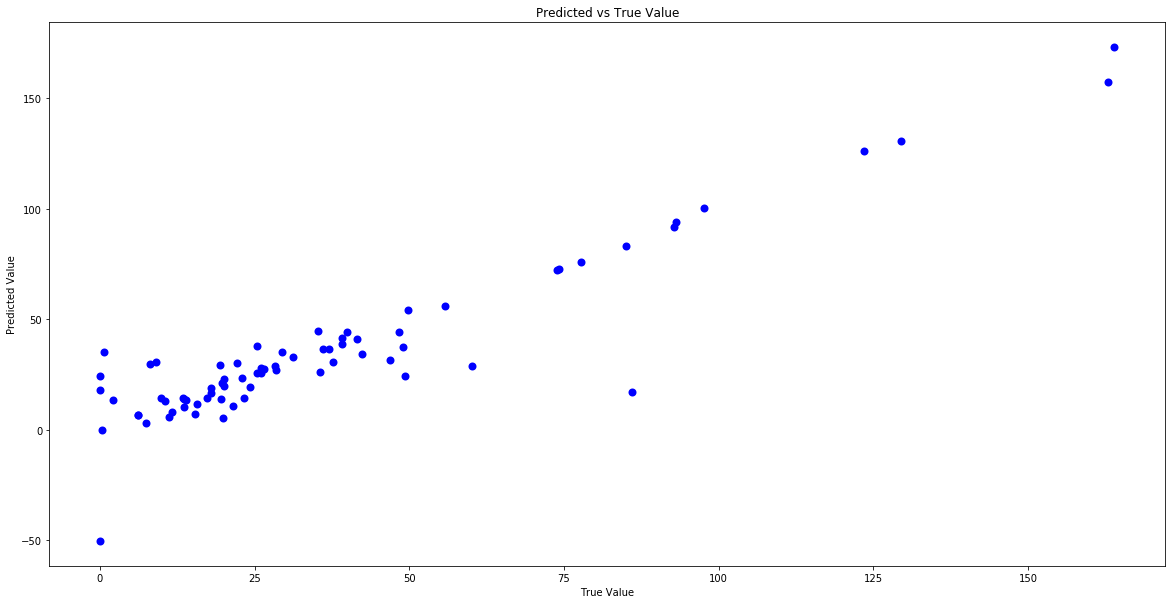

In [33]:
plt.figure(figsize=(20,10))
plt.scatter(y_val, y_predval, color='blue', linewidth=2)
plt.title('Predicted vs True Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()

In [34]:
c=lm.coef_.flatten()

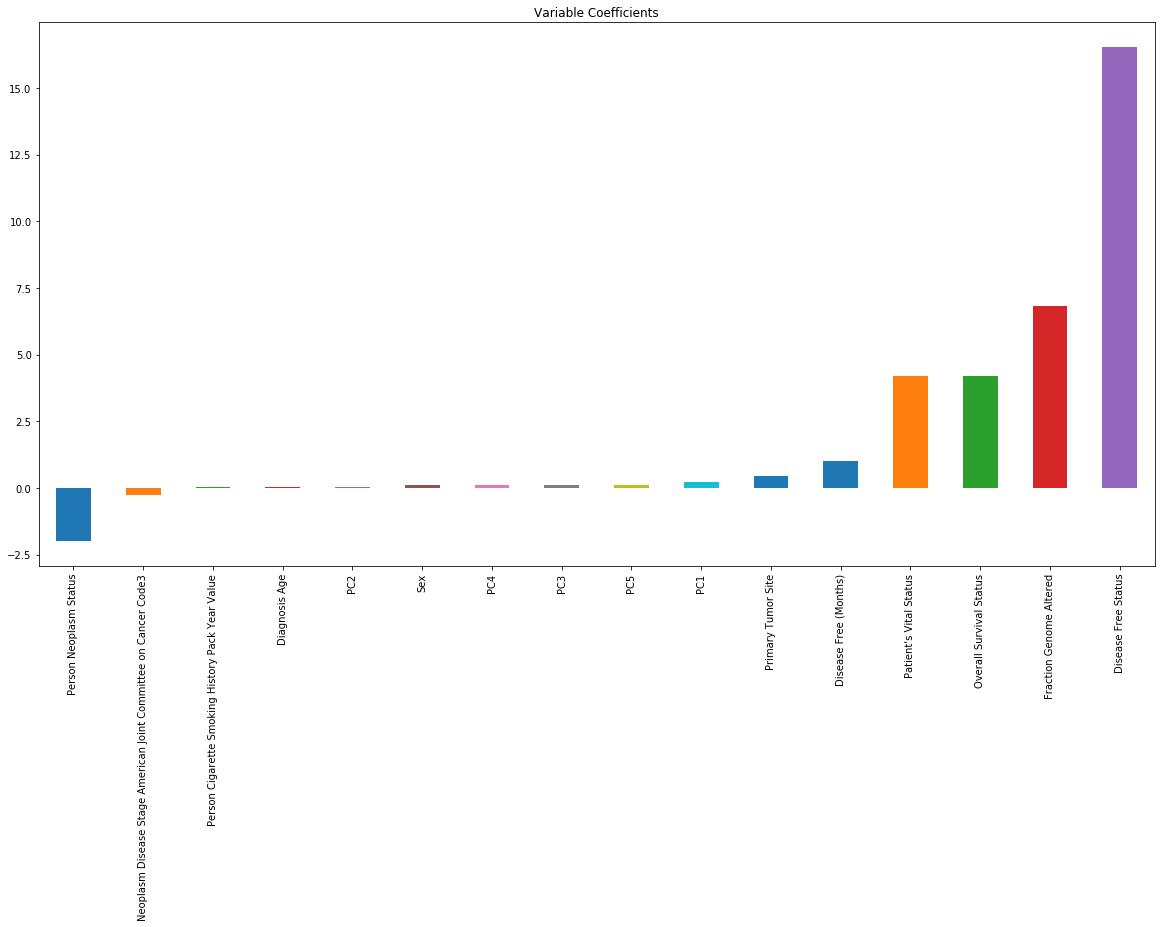

In [35]:
from pandas import Series
predictors=X_train.columns
plt.figure(figsize=(20,10))
plt.title('Variable Coefficients')
coef=Series(c,predictors).sort_values()
coef.plot(kind='bar')

In [39]:
lm.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lm.predict(X_test)

# Print result of MAE
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction (Accuracy Score)
print('Variance score: %.2f' % lm.score(X_test, y_test))


8.55110415829874
201.92729226440153
14.21011232413036
Variance score: 0.81


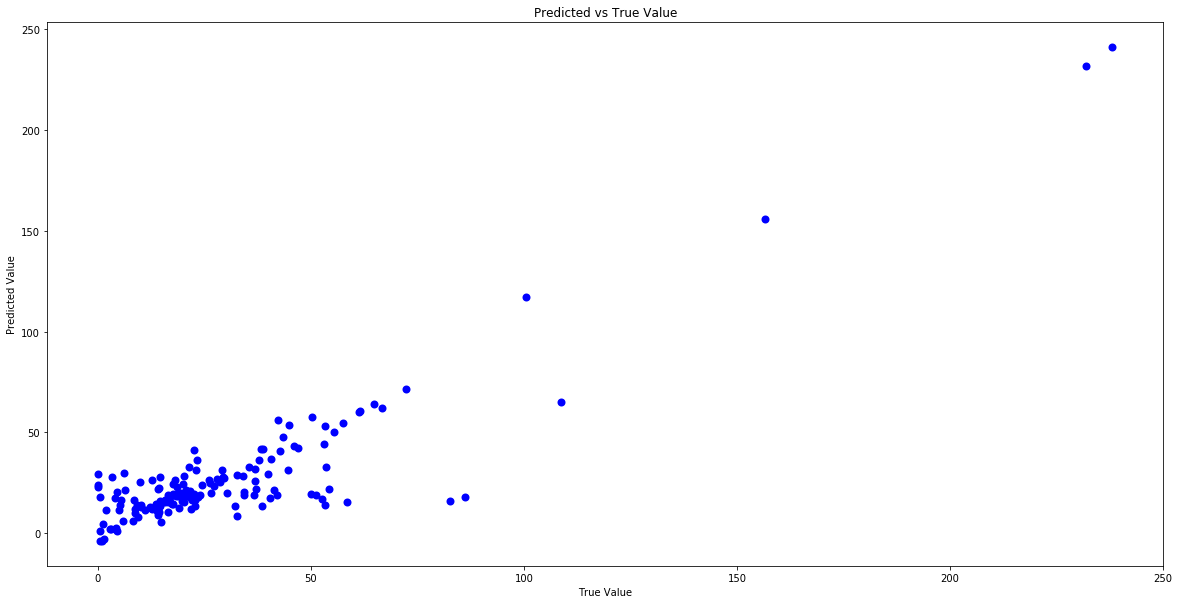

In [40]:
plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, color='blue', linewidth=2)
plt.title('Predicted vs True Value')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()